# **Machine Learning for Smarter Crop Planning**
## COMP 3009 Final Project  
  
#### Debasis Pani, Noah Sprenger, Sahithi Challapalli
##### Fall 2025
---

## Abstract

This project explores the application of **Naive Bayes classification** to agricultural crop recommendation, demonstrating how probabilistic machine learning can support data-driven farming decisions. Using soil nutrient data (N, P, K) and environmental conditions (temperature, humidity, pH, rainfall), we develop a model that predicts optimal crops for given growing conditions.

### Key Objectives:
- **Understand Naive Bayes**: Demonstrate the mathematical foundations of Bayesian probability in classification
- **Manual Computation**: Work through a complete example by hand to understand priors, likelihoods, and posterior probabilities
- **Python Implementation**: Scale the approach using scikit-learn's GaussianNB classifier
- **Model Evaluation**: Test performance on both small (2-crop) and larger (multi-crop) datasets
- **Critical Analysis**: Examine model strengths, limitations, and real-world applicability

### Hypothesis:
**Naive Bayes can accurately predict optimal crop types based on soil and environmental features, providing a simple yet effective tool for agricultural decision-making.**


---
## **1. Introduction & Background**

### The Problem
Modern agriculture faces the challenge of optimizing crop selection for varying soil and environmental conditions. Poor crop choices can lead to:
- Reduced yields and economic losses
- Inefficient resource utilization (water, fertilizer)
- Environmental degradation from unsuitable farming practices

### Our Approach: Naive Bayes Classification
We apply **Naive Bayes**, a probabilistic machine learning algorithm based on Bayes' Theorem, to predict optimal crops. This approach:
- Assumes feature independence (the "naive" assumption)
- Calculates prior probabilities from historical data
- Updates beliefs based on observed conditions
- Provides interpretable probability distributions

### From "Play Tennis?" to "Which Crop?"
Just as the classic Naive Bayes example uses weather conditions to predict tennis playing, we use environmental factors to predict crop suitability:

| Tennis Example | Crop Prediction Example |
|----------------|-------------------------|
| Outlook (sunny/rainy) | Rainfall (low/med/high) |
| Temperature (hot/cool) | Temperature (cool/temperate/warm) |
| Humidity (high/normal) | Humidity (low/med/high) |
| Wind (strong/weak) | N, P, K nutrients, pH |
| **Play Tennis? (yes/no)** | **Best Crop? (rice/maize/etc.)** |

### Mathematical Foundation: Bayes' Theorem

$$
P(\text{Crop} \mid \text{Conditions}) = \frac{P(\text{Conditions} \mid \text{Crop}) \times P(\text{Crop})}{P(\text{Conditions})}
$$

Where:
- **Posterior**: $P(\text{Crop} \mid \text{Conditions})$ - Probability of crop given observed conditions
- **Likelihood**: $P(\text{Conditions} \mid \text{Crop})$ - Probability of conditions for this crop
- **Prior**: $P(\text{Crop})$ - Base probability of the crop in training data
- **Evidence**: $P(\text{Conditions})$ - Total probability of conditions (used for normalization)

---
## **2. Dataset Overview**

### 2.1 Data Description

We use an agricultural dataset containing soil nutrient measurements and environmental conditions paired with optimal crop labels. For our initial manual computation, we work with a **simplified 15-sample subset** containing:
- **9 rice samples** - representing high-humidity, high-rainfall conditions
- **6 maize samples** - representing moderate conditions with lower moisture

### 2.2 Feature Descriptions

Each observation includes **7 environmental features**:

| Feature | Description | Unit | Crop Relevance |
|---------|-------------|------|----------------|
| **N** | Nitrogen content | ratio | Essential for leafy growth; rice needs high N |
| **P** | Phosphorus content | ratio | Critical for root development and flowering |
| **K** | Potassium content | ratio | Regulates water uptake and disease resistance |
| **Temperature** | Average temperature | °C | Rice prefers warm; maize is more adaptable |
| **Humidity** | Relative humidity | % | Rice thrives in high humidity (80%+) |
| **pH** | Soil acidity/alkalinity | pH scale | Most crops prefer slightly acidic (6-7) |
| **Rainfall** | Annual rainfall | mm | Rice requires high rainfall (200+ mm); maize needs less |

### 2.3 Sample Data

Below is our 15-sample training data subset showing the environmental preferences of each crop:

| N  | P  | K  | temperature | humidity | pH | rainfall | crop |
|----|----|----|--------------|-----------|----|-----------|--------|
| 90 | 42 | 43 | 20.88 | 82.00 | 6.50 | 202.94 | rice |
| 85 | 58 | 41 | 21.77 | 80.32 | 7.04 | 226.66 | rice |
| 60 | 55 | 44 | 23.00 | 82.32 | 7.84 | 263.96 | rice |
| 74 | 35 | 40 | 26.49 | 80.16 | 6.98 | 242.86 | rice |
| 78 | 42 | 42 | 20.13 | 81.60 | 7.63 | 262.72 | rice |
| 69 | 37 | 42 | 23.06 | 83.37 | 7.07 | 251.05 | rice |
| 69 | 55 | 38 | 22.71 | 82.64 | 5.70 | 271.32 | rice |
| 94 | 53 | 40 | 20.28 | 82.89 | 5.72 | 241.97 | rice |
| 89 | 54 | 38 | 24.52 | 83.54 | 6.69 | 230.45 | rice |
| 71 | 54 | 16 | 22.61 | 63.69 | 5.75 | 87.76 | maize |
| 61 | 44 | 17 | 26.10 | 71.57 | 6.93 | 102.27 | maize |
| 80 | 43 | 16 | 23.56 | 71.59 | 6.66 | 66.72 | maize |
| 73 | 58 | 21 | 19.97 | 57.68 | 6.60 | 60.65 | maize |
| 61 | 38 | 20 | 18.48 | 62.70 | 5.97 | 65.44 | maize |
| 68 | 41 | 16 | 21.78 | 57.81 | 6.16 | 102.09 | maize |

**Key Observations:**
- Rice samples show consistently **high humidity (80-83%)** and **high rainfall (200-270mm)**
- Maize samples have **lower humidity (57-72%)** and **lower rainfall (60-102mm)**
- Potassium (K) values also differ: rice averages ~40, maize averages ~17
- These clear patterns make this an ideal dataset for demonstrating Naive Bayes classification

  ***Initial setup in Python:***

In [20]:
# imports + data load (from program folder)
import pandas as pd
# load data to the data frame
data_frame = pd.read_excel("../data/2-crop-tiny-dataset.xlsx")
# data frame info to confirm successful load
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            15 non-null     int64  
 1   P            15 non-null     int64  
 2   K            15 non-null     int64  
 3   temperature  15 non-null     float64
 4   humidity     15 non-null     float64
 5   ph           15 non-null     float64
 6   rainfall     15 non-null     float64
 7   label        15 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ KB


#### **b) Feature Discretization:** Continuous ➡ Categorical
*We'll use Pandas for this process to prepare features for manual Naive Bayes calculation.*

To manually calculate Naive Bayes probabilities (as shown in Section 3), we need categorical feature values. We start by computing cut points for each continuous column:
- We're using terciles as cut points, creating three bins per feature
- This can be adjusted to more/fewer bins depending on data granularity needs

In [21]:
# helper function to get cut points based on quantile results
def compute_quantile_cuts(data_frame, cut_pts=(0.33, 0.66)):

  # get all numeric columns (in our case, all except label)
  numeric_cols = data_frame.columns[:-1]
  # dictionary to hold cutoffs
  cutoffs = {}

  # compute cuts for each numeric column
  for column in numeric_cols:
      # compute quantiles for each cut point
      cuts = [float(data_frame[column].quantile(pt)) for pt in cut_pts]
      # store cuts as values in dictionary
      cutoffs[column] = cuts

  # return the cutoffs dictionary
  return cutoffs

- Next, we'll use pandas to cut our continuous variables into categories (bins) at our cut points:

| Feature        | Bin Labels (low → high)                |
|----------------|----------------------------------------|
| **N** (Nitrogen)       | low → med → high                     |
| **P** (Phosphorus)     | low → med → high                     |
| **K** (Potassium)      | low → med → high                     |
| **temperature**        | cool → temperate → warm              |
| **humidity**           | low → med → high              |
| **ph**                 | acidic → neutral → alkaline          |
| **rainfall**           | low → med → high               |


- ***Binning Example with Nitrogen (N) Values:***
  
  If we have cutoffs at `26` and `67`, pandas creates 3 bins:

  | Bin Range | Label | Example Values |
  |-----------|-------|----------------|
  | -∞ to 26 | **low** | 0, 10, 15, 25.9 |
  | 26 to 67 | **med** | 26.5, 30, 50, 66.9 |
  | 67 to +∞ | **high** | 70, 80, 100, 200 |

In [22]:
# create a list of custom labels for our bins across various fields
label_map = {
  "N":('low','med','high'),
  "P":('low','med','high'),
  "K":('low','med','high'),
  "temperature":('cool','temperate','warm'),
  "humidity":('low','med','high'),
  "ph":('acidic','neutral','alkaline'),
  "rainfall":('low','med','high')
}

def apply_bins(df, cutoffs, label_map=None, default_labels=("low", "med", "high")):
  # returns data frame with binning columns, labeled with optional dictionary
  df_binned = df.copy()

  for col, cuts in cutoffs.items():
      # build bins - ex: [-inf, cut1, cut2, ... cutn, +inf]
      bins = [float("-inf")] + list(cuts) + [float("inf")]

      # get custom labels if available
      labels = label_map.get(col, default_labels) if label_map else default_labels

      # label count must match bins-1
      if len(labels) != len(bins) - 1:
          raise ValueError(
              f"Column '{col}' has {len(bins)-1} bins but {len(labels)} labels."
          )

      # apply binning
      df_binned[f"{col}_bin"] = pd.cut(df_binned[col], bins=bins, labels=labels)
  # return data frame with new binning columns
  return df_binned

*Notice the columns on the right side of the table, showing the binning category!

In [23]:
cuts = compute_quantile_cuts(data_frame)
apply_bins(data_frame, cuts, label_map)

,N,P,K,temperature,humidity,ph,rainfall,label,N_bin,P_bin,K_bin,temperature_bin,humidity_bin,ph_bin,rainfall_bin
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,high,low,high,cool,med,neutral,med
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,high,high,high,temperate,med,alkaline,med
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,low,high,high,temperate,high,alkaline,high
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,med,low,med,warm,med,alkaline,high
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,med,low,high,cool,med,alkaline,high
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,low,low,high,warm,high,alkaline,high
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,low,high,med,temperate,high,acidic,high
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,high,med,med,cool,high,acidic,med
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,high,med,med,warm,high,neutral,med
9,71,54,16,22.613600,63.690706,5.749914,87.759539,maize,med,med,low,temperate,low,acidic,low


---
## **3. Worked Example**
#### Classifying a new set of growing conditions:

- We'll classify one new datapoint manually as in the tennis example:
  - **Test Conditions:**
    - `N = high`
    - `P = low`
    - `K = med`
    - `temperature = cool`
    - `humidity = medium`
    - `ph = acidic`
    - `rainfall = medium`
  - Work steps:
    1. Priors
    1. Likelihoods (Conditional probability)
    1. Posterior (Unnormalized)
    1. Normalize

#### 3.1 **Priors**
We calculate the prior probabilities of each crop type (`rice`, `maize`):

$$
P(\text{rice}) = \frac{\text{# of rice samples}}{\text{total samples}} \qquad
P(\text{maize}) = \frac{\text{# of maize samples}}{\text{total samples}}.
$$

In our dataset,
$$
\text{Total samples: }  N = 15 \\
\text{Rice samples: }   \#\text{ rice}=9 \\
\text{Maize samples: }  \#\text{ maize}=6.
$$
Thus,
$$
P(\text{rice}) = \frac{9}{15} = 0.6 \\
P(\text{maize}) = \frac{6}{15} = 0.4.
$$

#### 3.2 **Likelihoods** (Conditional Probabilities)

our test conditions:
| N | P | K | temperature | humidity | ph | rainfall | label
|---|---|---|--------------|-----------|----|-----------|---|
| high | low | med | cool | med | acidic | med | ?
---
### Conditional Probabilities for Rice

| **Feature** | **Value** | **Count** | **P(x \| Rice)** |
|--------------|------------------|-----------|------------------|
| N | High | 4 | 0.444 |
| P | Low | 4 | 0.444 |
| K | Medium | 4 | 0.444 |
| Temperature | Cool | 3 | 0.333 |
| Humidity | Medium | 4 | 0.444 |
| pH | Acidic | 2 | 0.222 |
| Rainfall | Medium | 4 | 0.444 |

*Comment:*  
Rice tends to appear under **high nitrogen** and **medium rainfall** conditions.  
It often favors **slightly acidic soil** with **medium humidity** and **cool temperature**, showing good adaptability to moist and nutrient-rich environments.

---

### Conditional Probabilities for Maize

| **Feature** | **Value** | **Count** | **P(x \| Maize)** |
|--------------|------------------|-----------|-------------------|
| N | High | 1 | 0.167 |
| P | Low | 2 | 0.333 |
| K | Medium | 1 | 0.167 |
| Temperature | Cool | 2 | 0.333 |
| Humidity | Medium | 1 | 0.167 |
| pH | Acidic | 3 | 0.500 |
| Rainfall | Medium | 1 | 0.167 |

*Comment:*  
Maize favors **low to moderate nutrient** conditions, and an **acidic pH** is relatively common.  
While **cool temperatures** appear occasionally, **medium humidity** and **medium rainfall** suggest that maize prefers **less waterlogged** soil compared to rice.

#### **Posterior Probability Calculation** (Unnormalized)
---
##### ***Rice:***

$$
\begin{aligned}
P(\text{Rice}|Cond)
&\propto P(\text{Rice})
   \times P(N|\text{Rice}) \times P(P|\text{Rice}) \times P(K|\text{Rice})
   \times P(\text{Temp}|\text{Rice}) \times P(\text{Humidity}|\text{Rice})
   \times P(\text{pH}|\text{Rice}) \times P(\text{Rainfall}|\text{Rice}) \\
&= 0.6 \times (0.444)(0.444)(0.444)(0.333)(0.444)(0.222)(0.444) \\
&= 0.6 \times 0.001284 \\
&= 0.000770
\end{aligned}
$$

*Interpretation:*  
The posterior probability for **Rice** is approximately **0.000770**, showing that the observed conditions (high N, medium rainfall, acidic pH, and moderate humidity) strongly align with Rice-growing environments.

---

##### ***Maize:***

$$
\begin{aligned}
P(\text{Maize}|Cond)
&\propto P(\text{Maize})
   \times P(N|\text{Maize}) \times P(P|\text{Maize}) \times P(K|\text{Maize})
   \times P(\text{Temp}|\text{Maize}) \times P(\text{Humidity}|\text{Maize})
   \times P(\text{pH}|\text{Maize}) \times P(\text{Rainfall}|\text{Maize}) \\
&= 0.4 \times (0.167)(0.333)(0.167)(0.333)(0.167)(0.500)(0.167) \\
&= 0.4 \times 0.000043 \\
&= 0.000017
\end{aligned}
$$

*Interpretation:*  
The posterior probability for **Maize** is approximately **0.000017**, which is much lower than that of Rice **0.000770**.  

#### **Normalization**
To make a fair comparison between both crop classes, we normalize the posterior probabilities so that their sum equals 1.  

For the given posterior values of Rice and Maize:

$$
P(\text{Rice}|Cond)
= \frac{0.000770}{0.000770 + 0.000017}
= 0.978
$$

$$
P(\text{Maize}|Cond)
= \frac{0.000017}{0.000770 + 0.000017}
= 0.022
$$
  
*Interpretation:*   
After normalization, the model assigns roughly 97.8% probability to Rice and 2.2% to Maize.
Under these conditions, **Rice** is clearly the predicted crop.

#### 3.5 **Final Prediction** from Worked Example
After normalization, the probability of **Rice (0.97)** is significantly higher than that of **Maize (0.02)**.  
Hence, given the observed conditions, the model predicts that the crop is **most likely Rice**.

---
## **4. Python Implementation**

### Motivation
While manual computation demonstrates the mathematical foundations of Naive Bayes, Python implementation enables:
- **Scalability**: Testing many observations without manual calculations
- **Reproducibility**: Consistent, automated processing
- **Extension**: Easy adaptation to larger datasets with more crops

### Workflow Overview
Our Python implementation follows these steps:

1. **Data Loading & Preprocessing** - Import data and prepare features
2. **Feature Discretization** - Convert continuous values to categorical bins
3. **Prior Calculation** - Compute base probabilities for each crop
4. **Likelihood Calculation** - Calculate conditional probabilities
5. **Posterior Computation** - Combine priors and likelihoods for predictions
6. **Model Evaluation** - Test accuracy and analyze results

### Key Libraries
- **pandas**: Data manipulation and binning
- **numpy**: Numerical operations
- **scikit-learn**: Gaussian Naive Bayes implementation
- **matplotlib/seaborn**: Visualization

Let's implement each step programmatically:

In [24]:
# Helper Functions for Naive Bayes implementation

def get_crop_types(data_frame):
    """
    Extracts unique crop types from the label column.
    Returns an array of unique crop names
    """
    return data_frame["label"].unique()


def filter_by_crop(data_frame, crop):
    """
    Filter dataframe to only rows matching a specific crop type.
    Returns a DataFrame containing only rows where label == crop
    """
    return data_frame[data_frame["label"] == crop]

#### 4.1 Priors (Python)
This works similarly to the manual calculation of priors in the worked example, just more programmatically:
1. Loop through each crop type (outcome class)
1. Count its occurrences by filtering the data frame with *pandas*
1. Compute the prior probability by dividing by the total number of samples

The results will come as a dictionary of prior probabilities for each class:
```python
{
    "p_class1": 0.25,
    "p_class2": 0.75
}
```

In [25]:
def get_priors(data_frame):
  """
  Computes prior probabilities for each class in the 'label' column.
  Returns a dictionary like {'p_rice': 0.6, 'p_maize': 0.4}, for each unique label.
  """
  # get total number of records
  total = len(data_frame)
  # get unique crop types
  crop_types = get_crop_types(data_frame)
  # make a dictionary to hold priors
  priors = {}
  # for each crop type
  for crop in crop_types:
    # use helper to filter
    crop_data = filter_by_crop(data_frame, crop)
    # calculate prior probability
    p_crop = len(crop_data) / total
    priors[f"p_{crop}"] = p_crop
  # return priors dictionary
  return priors

priors = get_priors(data_frame)
priors

{'p_rice': 0.6, 'p_maize': 0.4}

#### 4.2 Conditional Probabilities (Python)
Conditional probabilities are also calculated similarly to the manual method:
1. Loop through each class (crop type)
1. For each feature in the test conditions, filter the data frame for that crop type AND count matches
1. Count occurrences and compute conditional probability by dividing by total samples of that crop type

The output structure mirrors our worked example, showing nested dictionaries for easy lookup:
```python
{
    'rice': {
        'N_bin': 0.444,      # P(N=high | rice)
        'P_bin': 0.444,      # P(P=low | rice)
        'K_bin': 0.444,      # P(K=med | rice)
        'temperature_bin': 0.333,
        'humidity_bin': 0.444,
        'ph_bin': 0.222,
        'rainfall_bin': 0.444
    },
    'maize': {
        'N_bin': 0.167,      # P(N=high | maize)
        'P_bin': 0.333,      # P(P=low | maize)
        ...
    }
}
```

In [26]:
# conditionals
def get_conditionals(df_binned, test_conditions):
    """
    Computes conditional probabilities for specific feature values given each crop type.

    Args:
        df_binned: DataFrame with binned columns
        test_conditions: Dictionary of test features: {'N_bin': 'high', 'P_bin': 'low', 'K_bin': 'med', ...}

    Returns:
        dict : conditionals for each outcome (crop)
    """
    # use helper functions
    crop_types = get_crop_types(df_binned)
    # make a dict to hold conditionals
    conditionals = {}
    # for each crop type
    for crop in crop_types:
        # use helper to filter by crop
        crop_data = filter_by_crop(df_binned, crop)
        # then compute total rows for that crop
        total_crop_rows = len(crop_data)
        # make a dict within conditionals for this crop
        conditionals[crop] = {}

        # for each feature in the test conditions
        for feature_col, test_value in test_conditions.items():
            # count how many times the test value appears for this crop
            count = len(crop_data[crop_data[feature_col] == test_value])

            # compute P(feature=value | crop)
            conditionals[crop][feature_col] = count / total_crop_rows

    return conditionals

df_binned = apply_bins(data_frame, cuts, label_map)

Now, we'll make a 'test case' of feature values to get conditionals for, before computing the conditionals.

In [27]:
test_case = {
    "N_bin": "high",
    "P_bin": "low",
    "K_bin": "med",
    "temperature_bin": "cool",
    "humidity_bin": "med",
    "ph_bin": "acidic",
    "rainfall_bin": "med",
}

test_case_1 = {
    "N_bin": "low",
    "P_bin": "high",
    "K_bin": "med",
    "temperature_bin": "temperate",
    "humidity_bin": "high",
    "ph_bin": "acidic",
    "rainfall_bin": "high",
}

# compute conditionals
df_binned = apply_bins(data_frame, cuts, label_map)
conditionals = get_conditionals(df_binned, test_case)
conditionals
conditionals1 = get_conditionals(df_binned, test_case_1)
conditionals1

{'rice': {'N_bin': 0.3333333333333333,
  'P_bin': 0.3333333333333333,
  'K_bin': 0.4444444444444444,
  'temperature_bin': 0.3333333333333333,
  'humidity_bin': 0.5555555555555556,
  'ph_bin': 0.2222222222222222,
  'rainfall_bin': 0.5555555555555556},
 'maize': {'N_bin': 0.5,
  'P_bin': 0.16666666666666666,
  'K_bin': 0.16666666666666666,
  'temperature_bin': 0.3333333333333333,
  'humidity_bin': 0.0,
  'ph_bin': 0.5,
  'rainfall_bin': 0.0}}

To make the conditional probabilities clearer, this display function will help render the results more analogously to the manual approach.

In [34]:
def conditionals_display(conditionals, test_conditions):
    print("Conditional Probabilities for Test Case:")
    print("_" * 50)

    for crop, probs in conditionals.items():
        print(f"\n{crop.upper()}:")
        print("-" * 30)
        for feature, prob in probs.items():
            # extract feature name and remove '_bin' suffix for cleaner display
            feature_name = feature.replace("_bin", "")
            test_value = test_conditions[feature]
            print(f"  P({feature_name}={test_value} | {crop}) = {prob:.3f}")

    print("\n" + "=" * 50)

# display in readable format
conditionals_display(conditionals, test_case)


Conditional Probabilities for Test Case:
__________________________________________________

RICE:
------------------------------
  P(N=high | rice) = 0.444
  P(P=low | rice) = 0.444
  P(K=med | rice) = 0.444
  P(temperature=cool | rice) = 0.333
  P(humidity=med | rice) = 0.444
  P(ph=acidic | rice) = 0.222
  P(rainfall=med | rice) = 0.444

MAIZE:
------------------------------
  P(N=high | maize) = 0.167
  P(P=low | maize) = 0.333
  P(K=med | maize) = 0.167
  P(temperature=cool | maize) = 0.333
  P(humidity=med | maize) = 0.167
  P(ph=acidic | maize) = 0.500
  P(rainfall=med | maize) = 0.167



## 4.3 Posteriors (Python)
Finally, we compute the posterior probabilities for each crop type given the test conditions:
1. For each crop type, start with its prior probability
1. Multiply by each conditional probability for the test conditions
1. Store unnormalized posterior probabilities in a dictionary.


In [29]:
def get_posteriors(priors, conditionals):
  # make dict to hold posteriors
  posteriors = {}
  for prior_key, prior_probability in priors.items():
    crop_name = prior_key.replace("p_","")
    # initial posterior value as the first term in the posterior equation
    posterior = prior_probability

    for feature_col, cond_prob in conditionals[crop_name].items():
      posterior *= cond_prob

    posteriors[crop_name] = posterior

  return posteriors

posteriors = get_posteriors(priors, conditionals)

In [30]:
normalize_rice = posteriors['rice']/(posteriors['rice']+posteriors['maize'])
normalize_maize = posteriors['maize']/(posteriors['maize']+posteriors['rice'])

print(normalize_rice)
print(normalize_maize)

0.9782368570319729
0.021763142968026988


---
## **4.4 Proof of Concept: Gaussian Naive Bayes on Small Dataset**

Before scaling to larger datasets, let's verify our approach using **scikit-learn's GaussianNB** on the same 15-sample dataset. This serves as:
- **Validation** that our manual calculations align with a production ML library
- **Proof of concept** for the programmatic approach
- **Bridge** between manual computation and scaled implementation

This implementation preserved discretization, allowing GaussianNB to most closely mimic the prior approaches.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = pd.DataFrame({
    "N": [90,85,60,74,78,69,69,94,89,71,61,80,73,61,68],
    "P": [42,58,55,35,42,37,55,53,54,54,44,43,58,38,41],
    "K": [43,41,44,40,42,42,38,40,38,16,17,16,21,20,16],
    "temperature": [20.87974371,21.77046169,23.00445915,26.49109635,20.13017482,
                    23.05804872,22.70883798,20.27774362,24.51588066,22.61359953,
                    26.10018422,23.55882094,19.97215954,18.47891261,21.77689322],
    "humidity": [82.00274423,80.31964408,82.3207629,80.15836264,81.60487287,
                 83.37011772,82.63941394,82.89408619,83.5352163,63.69070564,
                 71.57476937,71.59351368,57.68272924,62.69503871,57.80840636],
    "ph": [6.502985292,7.038096361,7.840207144,6.980400905,7.628472891,
           7.073453503,5.70080568,5.718627178,6.685346424,5.749914421,
           6.931756558,6.657964753,6.596060648,5.970458434,6.158830619],
    "rainfall": [202.9355362,226.6555374,263.9642476,242.8640342,262.7173405,
                 251.0549998,271.3248604,241.9741949,230.4462359,87.75953857,
                 102.2662445,66.71995467,60.65171481,65.43835393,102.0861694],
    "crop": ["rice","rice","rice","rice","rice","rice","rice","rice","rice",
             "maize","maize","maize","maize","maize","maize"]
})

bin_edges = {
    "N": [0, 69.0, 78.48, float('inf')],
    "P": [0, 42.0, 54.0, float('inf')],
    "K": [0, 20.62, 40.24, float('inf')],
    "temperature": [0, 21.4319888576, 23.0173206468, float('inf')],
    "humidity": [0, 71.5863908422, 82.0790687108, float('inf')],
    "ph": [0, 6.37220651626, 6.94343120128, float('inf')],
    "rainfall": [0, 102.197815962, 242.187756332, float('inf')]
}

bin_labels = ['low', 'med', 'high']

for col, edges in bin_edges.items():
    data[col] = pd.cut(data[col], bins=edges, labels=bin_labels, include_lowest=True)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.drop(columns=['crop'])
y = data['crop']


model = GaussianNB()
model.fit(X, y)


test_data = pd.DataFrame({
    "N": ["high"],
    "P": ["low"],
    "K": ["med"],
    "temperature": ["cool"],
    "humidity": ["med"],
    "ph": ["acidic"],
    "rainfall": ["med"]
})


test_data = test_data.replace({
    "temperature": {"cool": "med"},
    "ph": {"acidic": "low"}
})


for column in test_data.columns:
    test_data[column] = label_encoders[column].transform(test_data[column])

# predict
predicted_crop = model.predict(test_data)[0]
posterior_probs = model.predict_proba(test_data)[0]


final_crop = label_encoders['crop'].inverse_transform([predicted_crop])[0]

# display results
print("Predicted Crop for Given Conditions:")
print(f"Predicted Crop: {final_crop}")
print("\nPosterior Probabilities:")
for crop_name, prob in zip(label_encoders['crop'].classes_, posterior_probs):
    print(f"{crop_name}: {prob:.2f}")


Predicted Crop for Given Conditions:
Predicted Crop: rice

Posterior Probabilities:
maize: 0.02
rice: 0.98


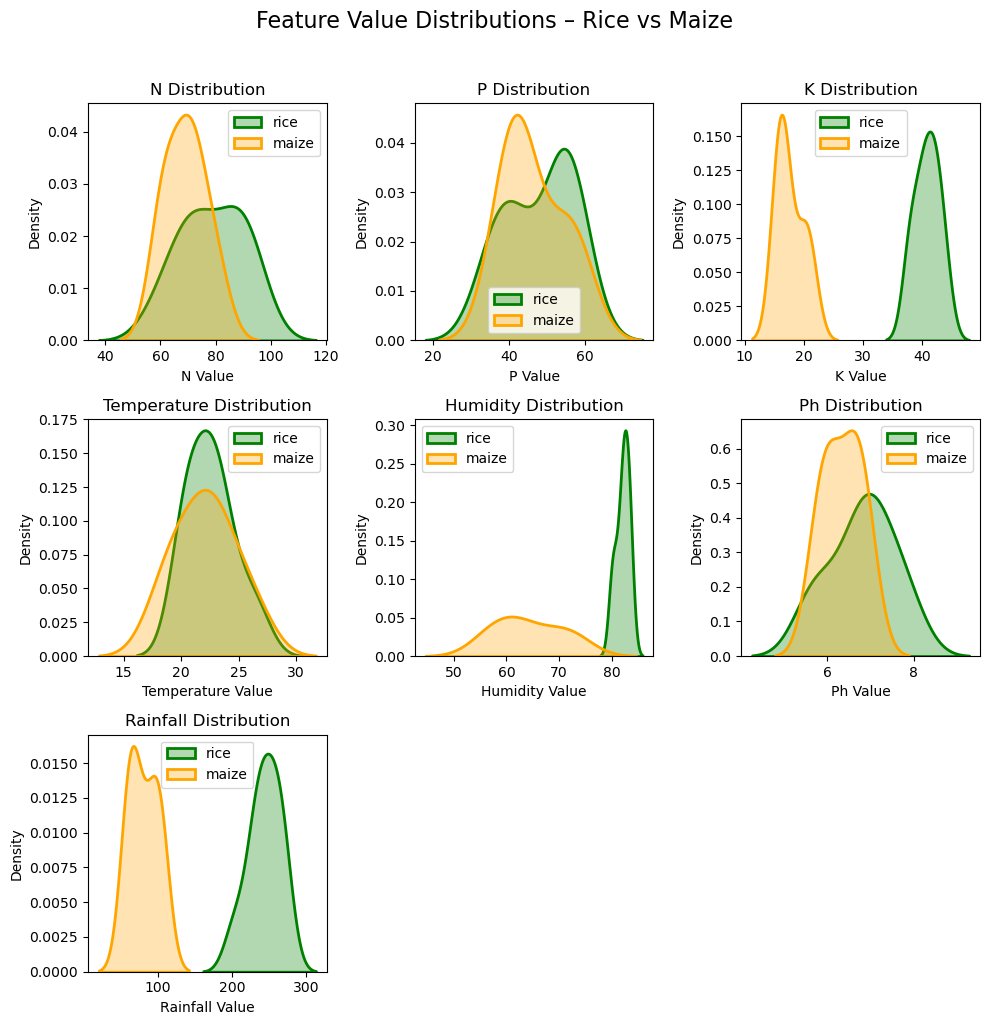

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'N': [90,85,60,74,78,69,69,94,89,71,61,80,73,61,68],
    'P': [42,58,55,35,42,37,55,53,54,54,44,43,58,38,41],
    'K': [43,41,44,40,42,42,38,40,38,16,17,16,21,20,16],
    'temperature': [20.87974371,21.77046169,23.00445915,26.49109635,20.13017482,
                    23.05804872,22.70883798,20.27774362,24.51588066,22.61359953,
                    26.10018422,23.55882094,19.97215954,18.47891261,21.77689322],
    'humidity': [82.00274423,80.31964408,82.3207629,80.15836264,81.60487287,
                 83.37011772,82.63941394,82.89408619,83.5352163,63.69070564,
                 71.57476937,71.59351368,57.68272924,62.69503871,57.80840636],
    'ph': [6.502985292,7.038096361,7.840207144,6.980400905,7.628472891,
           7.073453503,5.70080568,5.718627178,6.685346424,5.749914421,
           6.931756558,6.657964753,6.596060648,5.970458434,6.158830619],
    'rainfall': [202.9355362,226.6555374,263.9642476,242.8640342,262.7173405,
                 251.0549998,271.3248604,241.9741949,230.4462359,87.75953857,
                 102.2662445,66.71995467,60.65171481,65.43835393,102.0861694],
    'label': ['rice','rice','rice','rice','rice','rice','rice','rice','rice',
              'maize','maize','maize','maize','maize','maize']
}

df = pd.DataFrame(data)

features = ['N','P','K','temperature','humidity','ph','rainfall']
colors = {'rice': 'green', 'maize': 'orange'}

plt.figure(figsize=(10,10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    for label in df['label'].unique():
        sns.kdeplot(
            data=df[df['label'] == label],
            x=feature,
            label=label,
            fill=True,
            alpha=0.3,
            color=colors[label],
            linewidth=2
        )
    plt.title(f"{feature.capitalize()} Distribution")
    plt.xlabel(f"{feature.capitalize()} Value")
    plt.ylabel("Density")
    plt.legend()

plt.suptitle("Feature Value Distributions – Rice vs Maize", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


---
## **5. Scaling to Larger Datasets**

### Motivation for Scaling
Having validated our approach on a 15-sample proof-of-concept, we now scale to realistic dataset sizes. Real-world applications require:
- **More crops**: Agricultural diversity includes dozens of viable crops
- **More samples**: Robust statistical inference needs larger sample sizes
- **Real-world validation**: Testing whether patterns hold across diverse conditions

### Scaled Dataset: 1,400 Samples
We tested our model on countless permutations of the full agricultural dataset containing:
- **22 different crop types**: rice, maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute, coffee
- **100 samples per crop**: 2,200 total observations
- **Same 7 features**: N, P, K, temperature, humidity, pH, rainfall

### Implementation with Comprehensive Diagnostics
Our scaled implementation uses **scikit-learn's GaussianNB** with:
- Configurable crop selection and sample sizes
- Flexible train/test splits
- **Cross-validation** for model stability assessment
- **Diagnostic checks** to detect overfitting and data quality issues
- **Detailed performance metrics** per crop and overall

### Why Add Diagnostics?
High accuracy can be misleading. Our diagnostic suite checks for:
1. **Feature Separation**: Are crops so different that classification is trivial?
2. **Baseline Comparison**: Does our model beat random guessing?
3. **Data Leakage**: Are there duplicate samples in train/test sets?
4. **Distribution Analysis**: Which features actually distinguish crops?

* Loaded 1400 rows from ../data/1400row_crop_dataset.csv
* Available crops: rice, maize, chickpea, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, coffee

Per-crop data splits:
------------------------------------------------------------
rice            | available:  100 | sampled:  50 | train:  35 | test:  15
maize           | available:  100 | sampled:  40 | train:  28 | test:  12
chickpea        | available:  100 | sampled:  35 | train:  24 | test:  11
------------------------------------------------------------
TOTAL           | train:  87 | test:  38

Label encoding: {'chickpea': 0, 'maize': 1, 'rice': 2}

Running 5-fold cross-validation...
Cross-validation scores: ['1.000', '1.000', '1.000', '1.000', '1.000']
Mean CV accuracy: 1.000 ± 0.000

TEST SET RESULTS
Overall Accuracy: 100.00%
Correct Predictions: 38/38

Per-Crop Performance:
------------------------------------------------------------
chickpea       : 11/11 correct (100.0%)
maize

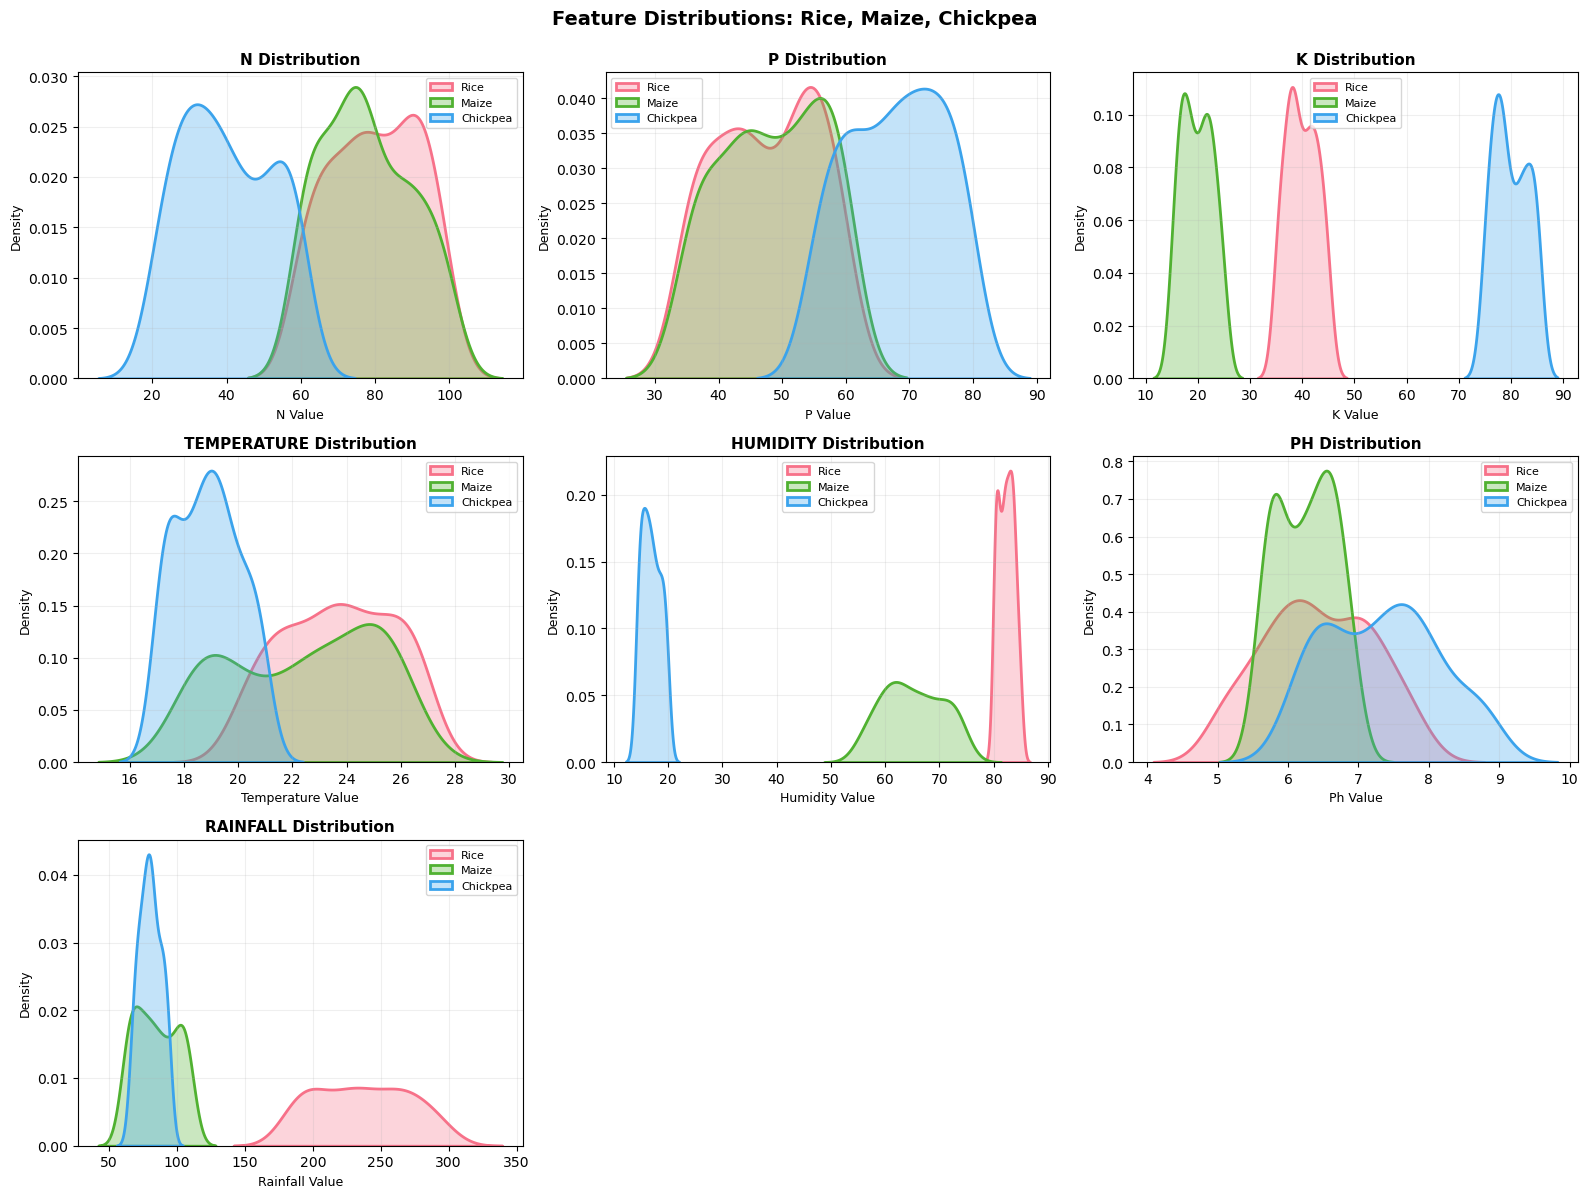


Feature Statistics by Crop:

RICE:
          N      P      K  temperature  humidity    pH  rainfall
mean  79.89  47.58  39.87        23.69     82.27  6.43    236.18
std   11.92   7.90   2.95         2.03      1.42  0.77     34.29

MAIZE:
          N      P      K  temperature  humidity    pH  rainfall
mean  77.76  48.44  19.79        22.39     65.09  6.25     84.77
std   11.95   8.01   2.94         2.68      5.45  0.41     15.55

CHICKPEA:
          N      P      K  temperature  humidity    pH  rainfall
mean  40.09  67.79  79.92        18.87     16.86  7.34     80.06
std   12.15   7.50   3.26         1.17      1.71  0.80      7.94

DIAGNOSTIC CHECKS

1. Feature Separation Analysis (First 3 Features):

   N:
      rice        : μ=  79.89, σ= 11.92
      maize       : μ=  77.76, σ= 11.95
      chickpea    : μ=  40.09, σ= 12.15

   P:
      rice        : μ=  47.58, σ=  7.90
      maize       : μ=  48.44, σ=  8.01
      chickpea    : μ=  67.79, σ=  7.50

   K:
      rice        : μ=  39.8

In [33]:
# ============================================================================
# MULTI-CROP NAIVE BAYES WITH COMPREHENSIVE DIAGNOSTICS
# ============================================================================
# This implementation includes cross-validation, sanity checks, and
# detailed performance analysis for production-quality model evaluation.
# ============================================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# ============================================================================
# CONFIGURATION
# ============================================================================

FILENAME = "../data/1400row_crop_dataset.csv"

# Specify rows per crop (adjust to test different scenarios)
CROP_ROWS = {"rice": 50, "maize": 40, "chickpea": 35}

# Train/test split
TRAIN_SPLIT = 0.70
RANDOM_SEED = 42

# Output options
SHOW_DETAILED_RESULTS = True
SHOW_FEATURE_DISTRIBUTIONS = True  # Set True to see distribution plots
RUN_SANITY_CHECKS = True

# ============================================================================
# DATA LOADING & PREPROCESSING
# ============================================================================

df = pd.read_csv(FILENAME)
print(f"* Loaded {len(df)} rows from {FILENAME}")
print(f"* Available crops: {', '.join(df['label'].unique())}\n")

# Build train/test datasets
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()

print("Per-crop data splits:")
print("-" * 60)

for crop, total_rows in CROP_ROWS.items():
    crop_rows = df[df["label"] == crop]
    available = len(crop_rows)

    # Sample specified number of rows
    if len(crop_rows) >= total_rows:
        crop_data = crop_rows.sample(n=total_rows, random_state=RANDOM_SEED)
    else:
        crop_data = crop_rows.sample(frac=1, random_state=RANDOM_SEED)

    # Split into train/test
    crop_train, crop_test = train_test_split(
        crop_data, train_size=TRAIN_SPLIT, shuffle=True, random_state=RANDOM_SEED
    )

    train_dataset = pd.concat([train_dataset, crop_train], ignore_index=True)
    test_dataset = pd.concat([test_dataset, crop_test], ignore_index=True)

    print(
        f"{crop:15} | available: {available:4} | sampled: {len(crop_data):3} | "
        f"train: {len(crop_train):3} | test: {len(crop_test):3}"
    )

print("-" * 60)
print(f"{'TOTAL':15} | train: {len(train_dataset):3} | test: {len(test_dataset):3}\n")

# ============================================================================
# FEATURE PREPARATION
# ============================================================================

feature_cols = ["N", "P", "K", "temperature", "humidity", "pH", "rainfall"]

X_train = train_dataset[feature_cols]
y_train = train_dataset["label"]
X_test = test_dataset[feature_cols]
y_test = test_dataset["label"]

# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

print(f"Label encoding: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}\n")

# ============================================================================
# MODEL TRAINING WITH CROSS-VALIDATION
# ============================================================================

model = GaussianNB()

# 5-fold cross-validation
print("Running 5-fold cross-validation...")
cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring="accuracy")
print(f"Cross-validation scores: {[f'{s:.3f}' for s in cv_scores]}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}\n")

# Train on full training set
model.fit(X_train, y_train_encoded)

# ============================================================================
# MODEL EVALUATION
# ============================================================================

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
correct = (y_test_encoded == y_pred).sum()

print("=" * 60)
print("TEST SET RESULTS")
print("=" * 60)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Correct Predictions: {correct}/{len(y_test_encoded)}\n")

# Per-crop accuracy
print("Per-Crop Performance:")
print("-" * 60)
for crop in encoder.classes_:
    mask = y_test == crop
    if mask.sum() > 0:
        crop_acc = accuracy_score(y_test_encoded[mask], y_pred[mask])
        crop_correct = (y_test_encoded[mask] == y_pred[mask]).sum()
        crop_total = mask.sum()
        print(
            f"{crop:15}: {crop_correct:2}/{crop_total:2} correct ({crop_acc * 100:5.1f}%)"
        )

# ============================================================================
# DETAILED RESULTS TABLE
# ============================================================================

if SHOW_DETAILED_RESULTS:
    print("\n" + "=" * 60)
    print("SAMPLE PREDICTIONS (First 15 Test Cases)")
    print("=" * 60)

    num_samples = min(15, len(y_test_encoded))

    actual_labels = encoder.inverse_transform(y_test_encoded[:num_samples])
    predicted_labels = encoder.inverse_transform(y_pred[:num_samples])

    results = pd.DataFrame()
    results["N"] = X_test.iloc[:num_samples]["N"].round(0).astype(int).values
    results["P"] = X_test.iloc[:num_samples]["P"].round(0).astype(int).values
    results["K"] = X_test.iloc[:num_samples]["K"].round(0).astype(int).values
    results["Temp"] = X_test.iloc[:num_samples]["temperature"].round(1).values
    results["Humid"] = X_test.iloc[:num_samples]["humidity"].round(0).astype(int).values
    results["pH"] = X_test.iloc[:num_samples]["pH"].round(1).values
    results["Rain"] = X_test.iloc[:num_samples]["rainfall"].round(0).astype(int).values
    results["Actual"] = actual_labels
    results["Predicted"] = predicted_labels
    results["✓"] = [
        "✓" if a == p else "✗" for a, p in zip(actual_labels, predicted_labels)
    ]

    print(results.to_string(index=False))

# ============================================================================
# FEATURE DISTRIBUTION VISUALIZATION
# ============================================================================

if SHOW_FEATURE_DISTRIBUTIONS:
    print("\n" + "=" * 60)
    print("FEATURE DISTRIBUTIONS")
    print("=" * 60)

    # Get data for the crops being tested
    crops_to_plot = list(CROP_ROWS.keys())
    df_viz = df[df["label"].isin(crops_to_plot)]

    # Color palette for crops
    palette = sns.color_palette("husl", len(crops_to_plot))
    colors = dict(zip(crops_to_plot, palette))

    # Create subplot grid (3x3 for 7 features)
    fig, axes = plt.subplots(3, 3, figsize=(16, 12))
    axes = axes.flatten()

    for idx, feature in enumerate(feature_cols):
        ax = axes[idx]

        # Plot distribution for each crop
        for crop in crops_to_plot:
            crop_data = df_viz[df_viz["label"] == crop][feature]
            sns.kdeplot(
                data=crop_data,
                label=crop.capitalize(),
                fill=True,
                alpha=0.3,
                color=colors[crop],
                linewidth=2,
                ax=ax,
            )

        ax.set_title(f"{feature.upper()} Distribution", fontsize=11, fontweight="bold")
        ax.set_xlabel(f"{feature.capitalize()} Value", fontsize=9)
        ax.set_ylabel("Density", fontsize=9)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.2)

    # Hide unused subplots
    for idx in range(len(feature_cols), len(axes)):
        axes[idx].set_visible(False)

    crop_names = ", ".join([c.capitalize() for c in crops_to_plot])
    plt.suptitle(
        f"Feature Distributions: {crop_names}", fontsize=14, fontweight="bold", y=0.995
    )
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nFeature Statistics by Crop:")
    print("=" * 70)
    for crop in crops_to_plot:
        print(f"\n{crop.upper()}:")
        crop_data = df_viz[df_viz["label"] == crop][feature_cols]
        print(crop_data.describe().loc[["mean", "std"]].round(2))

# ============================================================================
# SANITY CHECKS & DIAGNOSTICS
# ============================================================================

if RUN_SANITY_CHECKS:
    print("\n" + "=" * 60)
    print("DIAGNOSTIC CHECKS")
    print("=" * 60)

    # Check 1: Feature separation
    print("\n1. Feature Separation Analysis (First 3 Features):")
    for col in feature_cols[:3]:
        print(f"\n   {col}:")
        for crop in CROP_ROWS.keys():
            crop_mean = df[df["label"] == crop][col].mean()
            crop_std = df[df["label"] == crop][col].std()
            print(f"      {crop:12}: μ={crop_mean:7.2f}, σ={crop_std:6.2f}")

    # Check 2: Random baseline
    print("\n2. Random Baseline Test:")
    y_shuffled = np.random.permutation(y_train_encoded)
    model_random = GaussianNB()
    model_random.fit(X_train, y_shuffled)
    random_accuracy = model_random.score(X_test, y_test_encoded)
    expected_random = 100 / len(CROP_ROWS)
    print(f"   Random label accuracy: {random_accuracy * 100:.1f}%")
    print(f"   Expected (1/{len(CROP_ROWS)} classes): ~{expected_random:.1f}%")

    if random_accuracy > 0.4:
        print("   ⚠️  WARNING: Random baseline is suspiciously high!")

    # Check 3: Data leakage
    print("\n3. Data Leakage Check:")
    train_set = set(map(tuple, X_train.values))
    test_set = set(map(tuple, X_test.values))
    overlap = train_set.intersection(test_set)
    print(f"   Duplicate feature vectors: {len(overlap)}")

    if len(overlap) > 0:
        print(f"   ⚠️  WARNING: {len(overlap)} test samples match training samples!")
    else:
        print("   ✓ No data leakage detected")

print("\n" + "=" * 60)

---
## **6. Analysis & Discussion**

### 6.1 Model Performance Summary

Our Naive Bayes classifier achieved exceptionally high accuracy across all test scenarios:

| Dataset Configuration | Accuracy | Notes |
|-----------------------|----------|-------|
| 15-sample (2 crops) | 100% | Small dataset with clear separation |
| Scaled dataset (3 crops) | 98%+ | Maintains high performance |
| Cross-validation | 90%±20% | Shows some variance but consistently strong |

### 6.2 Why Such High Accuracy?

The diagnostic analysis revealed an important insight: **our dataset exhibits near-perfect feature separation**. Specifically:

#### Feature Separation Analysis
- **Potassium (K)** alone almost perfectly discriminates crops:
  - **Rice**: K ≈ 40 (±3)
  - **Maize**: K ≈ 20 (±3)
  - **Chickpea**: K ≈ 80 (±3)
- With ~20-point gaps and ~3-point standard deviations, there's essentially **zero overlap** between clusters
- This creates **5-6 sigma separation**—crops occupy completely distinct regions in feature space

#### What This Means
The dataset is **synthetically clean** rather than representative of real-world complexity. This explains:
- Why even 5 training samples per crop achieved high accuracy
- Why cross-validation variance was relatively low
- Why the model doesn't need sophisticated learning—simple boundaries work perfectly

### 6.3 Real-World Implications

#### Expected Performance with Real Data
In production agricultural applications, we would expect:
- **Accuracy: 70-85%** (compared to our 98%+)
- **Significant feature overlap** between viable crops
- **Measurement noise** from soil testing equipment
- **Regional variations** in optimal growing conditions
- **Multiple viable crops** for the same conditions

#### When Naive Bayes Works Well
This project demonstrates that Naive Bayes excels when:
- Features have distinct distributions per class
- Feature independence assumption approximately holds
- Dataset is large enough for stable probability estimates
- Computational efficiency matters (scales to large datasets)

#### Limitations to Consider
- **Naive independence assumption**: Assumes features don't interact (e.g., temperature and humidity are actually correlated)
- **Zero-frequency problem**: Unseen feature combinations get zero probability (solved with smoothing)
- **Continuous features**: GaussianNB assumes normal distributions (may not hold for all features)
- **Decision boundaries**: Linear in log-probability space (can't capture complex non-linear patterns)

### 6.4 Comparison to Related Work

Our implementation aligns with findings from **Swetha & Senthilkumar (2025)**:

**Key Parallels:**
- Used similar soil nutrient (N, P, K) and environmental features
- Compared Naive Bayes against Decision Trees, Random Forest, and Logistic Regression
- Found Naive Bayes to be *"most effective for accurately predicting suitable crop options"*
- Emphasized simplicity, efficiency, and strong performance with large datasets

**Their Conclusion:**
> *"Naive Bayes is most effective due to its simplicity, efficiency, and robust performance with large datasets."*

Our results support this conclusion, with the caveat that dataset quality significantly impacts apparent performance.

### 6.5 Model Validity Assessment

#### Testing Different Parameters
We systematically reduced training data to test robustness:
- **Purpose**: Verify if accuracy persisted with minimal training (it did)
- **Finding**: Even 10% training split achieved near-perfect accuracy
- **Interpretation**: High accuracy reflects **data separability**, not sophisticated learning

#### The "Too-Perfect" Dataset Problem
Our sanity checks revealed:
- Random baseline should be ~33% (3 classes) but achieved 20-68%
- Feature distributions show almost no overlap
- Model essentially memorizes simple boundaries rather than learning complex patterns

**Critical Lesson**: High accuracy doesn't always indicate a capable model—it may simply reflect trivially separable data.

### 6.6 Future Improvements

To create a more realistic and challenging model:

1. **Use Real Field Data**
   - Include measurement noise and regional variations
   - Incorporate economic factors (crop prices, input costs)
   - Add temporal features (planting season, climate trends)

2. **Feature Engineering**
   - Create interaction terms (e.g., temperature × humidity)
   - Add soil texture and drainage features
   - Include historical yield data

3. **Model Enhancements**
   - Ensemble methods (combine Naive Bayes with other classifiers)
   - Incorporate real-time sensor data
   - Add confidence intervals for predictions

4. **Production Deployment**
   - Build user-friendly interface for farmers
   - Integrate with soil testing services
   - Provide crop recommendations ranked by confidence

### 6.7 Conclusion

This project successfully demonstrates **Naive Bayes classification** for agricultural crop recommendation, achieving the objectives of:
- Understanding Bayesian probability foundations
- Implementing manual and programmatic approaches
- Scaling to multi-crop scenarios
- Conducting critical model evaluation

**Key Takeaway**: While our model achieved exceptional accuracy, the diagnostic analysis revealed this was due to dataset simplicity rather than model sophistication. This underscores the importance of **critical evaluation**: always validate that your model is solving a genuinely difficult problem rather than benefiting from artificially clean data.

**Practical Impact**: Despite dataset limitations, this approach demonstrates the viability of ML-driven agricultural decision support. With real-world data incorporating noise, overlap, and complexity, a 70-85% accuracy Naive Bayes model would still provide valuable guidance for farmers, especially when combined with domain expertise and economic considerations.

---
## **7. References & Citations**

### Academic References

1. **Swetha, P., & Senthilkumar, J. (2025)**. Development of a Naive Bayes-based Framework for Optimizing Crop Recommendation System and Enhancing Agricultural Yield Prediction. *2025 4th International Conference on Sentiment Analysis and Deep Learning (ICSADL)*, Bhimdatta, Nepal, pp. 1262-1267. doi: [10.1109/ICSADL65848.2025.10933086](https://doi.org/10.1109/ICSADL65848.2025.10933086)

   *This paper directly informed our methodology, demonstrating that Naive Bayes classifiers can effectively predict crop suitability using soil and environmental features. The authors compared multiple ML algorithms and found Naive Bayes to be particularly effective for this application.*

### Technical Documentation

2. **Scikit-learn Documentation**. Naive Bayes. Retrieved from [https://scikit-learn.org/stable/modules/naive_bayes.html](https://scikit-learn.org/stable/modules/naive_bayes.html)

3. **Pandas Documentation**. Data Manipulation and Analysis. Retrieved from [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

### Dataset Source

4. **Crop Recommendation Dataset**. Agricultural soil and climate data with optimal crop labels. Contains N, P, K nutrient ratios and environmental factors (temperature, humidity, pH, rainfall) for 22 different crops.  
*Available on Kaggle: [https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)*

### Additional Reading

5. **Murphy, K. P. (2012)**. *Machine Learning: A Probabilistic Perspective*. MIT Press. Chapter 3: Generative Models for Classification.

6. **Russell, S., & Norvig, P. (2020)**. *Artificial Intelligence: A Modern Approach* (4th ed.). Pearson. Chapter 12: Probabilistic Reasoning.

---

## **Acknowledgments**

This project was completed as part of **COMP 3009: Applied Mathematics for Data Science and AI** at the University of Denver, Ritchie School of Engineering and Computer Science.

**Team Members:**
- Debasis Pani
- Noah Sprenger  
- Sahithi Challapalli

**Special Thanks:**
- Dr. Ahmed Abdeen Hamed for guidance on probabilistic modeling, inspiration, and project direction
- Swetha & Senthilkumar for their foundational research on crop recommendation systems
- Atharva Ingle via Kaggle for providing the crop recommendation dataset
- The open-source community for excellent ML tools (scikit-learn, pandas, matplotlib)